In [10]:
# とりあえず拾い物
# https://qiita.com/TomokIshii/items/b9a11c19bd5c36ad0287
# Qiita @TomokIshii 感謝します

In [11]:
import numpy as np
from scipy.stats import norm, skewnorm, entropy
import matplotlib.pyplot as plt

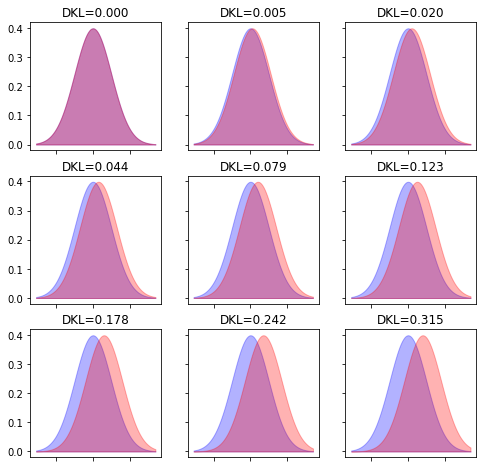

In [12]:
ndiv = 100
px =  np.linspace(norm.ppf(0.001), (norm.ppf(0.999) * 1.1), ndiv)

# Shifted normal distributions
fig, axes = plt.subplots(3, 3, figsize=(8, 8), sharey=True)
loc_opts = np.array([i * 0.1 for i in range(9)])
loc_opts = loc_opts.reshape([3, 3])

pdf_std = norm.pdf(px, loc=0., scale=1.)    # reference distribution
py_zero = np.zeros_like(px)                 # y=0.0 line

for i in range(3):
    for j in range(3):
        norm_ij = norm(loc=loc_opts[i, j], scale=1.)
        pdf_ij = norm_ij.pdf(px)

        ax_ij = axes[i, j]
        ax_ij.fill_between(px, pdf_std, py_zero, color='b', alpha=0.3)

        ax_ij.fill_between(px, pdf_ij, py_zero, color='r', alpha=0.3)
        ax_ij.set_xticklabels([])

        dkl_ij = entropy(pdf_std, pdf_ij)
        title_str = 'DKL={:>.3f}'.format(dkl_ij)
        ax_ij.set_title(title_str)

In [13]:
def kl(w1,w2):
    return stats.entropy(w1, w2, 2)

eat = np.array([0.9, 0.1])
devour = np.array([1.8, 1.2])

print("kl divergence")
print(kl(devour, eat))

kl divergence
0.449022499567
